# Exercise 3 [10.0]

## Occupancy grid mapping

The aim of this assignment is to implement a 2D occupancy grid mapping algorithm as described in the lecture. We provide data recorded by a robot using a 2D laser scanner in an indoor environment. 

The raw data is arranged in the following manner:

- `poses.data`: contains the **known** robot poses as it moves around the environment. Each line corresponds to the pose of the robot at a time instant

- `ranges.data`: contains 2d laser range measurements recorded by the robot. Each line corresponds to the range measurements taken from the corresponding robot poses.

---

### Log odds to probability [2.0]

The occupancy calculations are usually performed using the log odds. We will need to convert between log odds and probabilities in this exercise. Implement the `logodds2prob` and `prob2logodds` functions. Verify that the conversion functions are correct for some test input. 

In [1]:
import ex3 as ex
print(ex.prob2logodds(0))
print(ex.prob2logodds(0.5))
print(ex.prob2logodds(0.9999999999))
print(ex.logodds2prob(0))
print(ex.logodds2prob(-float("inf")))
print(ex.logodds2prob(float("inf")))

-inf
0.0
23.025850847100088
0.5
0.0
1.0


In [2]:
# need to get a better sense of the data:
import numpy as np
ranges = np.genfromtxt('ranges.data', delimiter=',')
poses = np.genfromtxt('poses.data', delimiter=',')
print(ranges.shape, poses.shape)

(686, 361) (686, 3)


In [3]:
# ok we're getting there. So we have 686 states in total. the pose of the robot (3 variables: x, y, and theta) changes after each state. And
# in each pose, 361 laser beams are shot. Consecutive laser beams are "angular_res = 0.0087270" radians apart from one another. The angular resolution,
# when multiplied by the number of beams (361), yields 3.15 which is roughly pi radians. This means that the range of vision for the laser scanner is,
# approximately 180 degrees.

---
### Inverse sensor model [2.0]

The occupancy grid mapping relies on as inverse sensor model to update the occupancy of a cell in the grid. For this exercise, we consider a simple sensor model, where the occupancy of cell $m_i$ is $P_{occ}$ if the measurement $z_t$ falls in that cell, otherwise the occupancy is $P_{free}$. 

However, if the cell $m_i$ is not in the perception field, the occupancy will be $P_{prior}$.

Use the  following probabilities in the implementation:
$$P_{occ} = 0.85, P_{free} = 0.4, P_{prior} = 0.5 $$

Implement the inverse sensor model function and verify that it is correct for some test input. 

In [4]:
endpoint = [200,200]
cell1 = [100,250]
prob_occ = 0.85
prob_free = 0.4
prob_cell1 = ex.inv_sensor_model(cell1, endpoint, prob_occ, prob_free)
print(prob_cell1)
cell2 = [200,200]
prob_cell2 = ex.inv_sensor_model(cell2, endpoint, prob_occ, prob_free)
print(prob_cell2)

-0.4054651081081643
1.7346010553881064


Please note that since we are going to add the result of this function to other log-odds terms (the recursive term and the priro) later, I defined this function to yield the log-odds instead of probabilities. So the result that you may have expected to see after running the above cell is actually:

In [5]:
print(ex.logodds2prob(prob_cell1))
print(ex.logodds2prob(prob_cell2))

0.4
0.85


---
### Occupancy grid mapping algorithm [6.0]:

Implement the occupancy grid mapping algorithm as described in lecture slides. 

We provide some functions to make the implemntation easier.

- `ranges2cells` converts the raw measurements acquired by the robot (*ranges_raw*) into the correspoding cells of the gridmap.
- `poses2cells` converts the raw poses of the robot (*poses_raw*) into the correspoding cells of the gridmap.
- `bresenham` returns all the cells along a straigh line between two points in the gridmap.

Other parameters you may need in the implemntation are provided below.

Implement the `grid_mapping_with_known_poses` functionn and compute the resulting occupancy grid map using all the measurements provided in the data.

Plot the final occupancy gridmap using the `plot_gridmap` function. 


In [6]:
import ex3 as ex
import numpy as np
%matplotlib inline

map_size = 100
map_res = 0.25
prior = 0.5 # basically means that we set l0 to 0. because ex.prob2logodds(0.5) = 0. this reduces our update to only two terms, the recursive term,
# and the inverse sensor model.

# load data
ranges_raw = np.loadtxt("ranges.data", delimiter=',', dtype='float')
poses_raw = np.loadtxt("poses.data", delimiter=',', dtype='float')

Some remarks about the functions `ranges2cells` and `poses2cells`:
`ranges2cells` only works correctly if you give it the transposed `ranges_raw` array, and not entirely at once, but column by column.
`poses2cells` also, only works when given one pose (1x3 vector) at a time

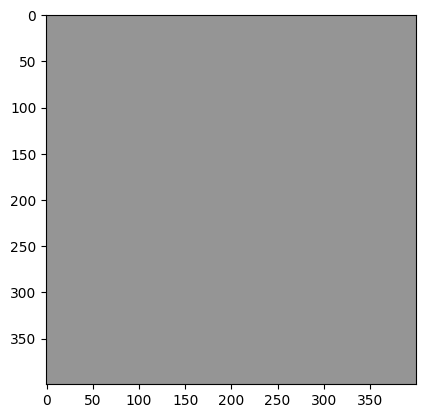

In [7]:
# initialize gridmap
occ_gridmap = ex.init_gridmap(map_size, map_res)+prior
ex.plot_gridmap(occ_gridmap)

D:\Downloads\Uni Bonn\Courses\MSR-01 Sensors and State Estimation\Robotics Track\HW3\ex03-grip\assignment\ex3.py:76: RuntimeWarning: overflow encountered in exp
  p = 1 - 1/(1 + np.exp(l))


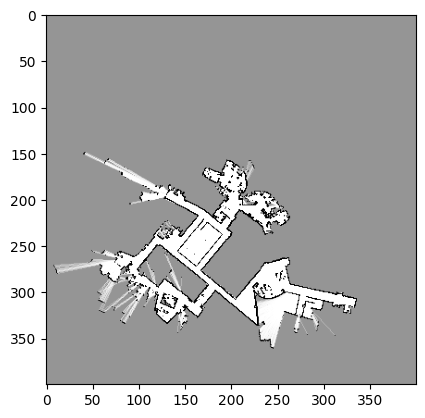

In [11]:
occ_gridmap = ex.grid_mapping_with_known_poses(poses_raw, ranges_raw, map_res, occ_gridmap, prior, prob_free = 0.4, prob_occ = 0.85)
ex.plot_gridmap(occ_gridmap)